In [2]:
import pandas as pd
import sqlite3

import os
from dotenv import load_dotenv
from utils.get_or_create_combined_database import get_or_create_combined_database
load_dotenv(verbose=True, override=True)

database_folder = os.getenv("DATABASE_FOLDER")

database_file = get_or_create_combined_database(database_folder)

table_name = "champs_cleaned"

conn = sqlite3.connect(database_file)
query = 'SELECT * FROM champs_cleaned'
data = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the dataframe
data.head()

Found 101 database files in the folder specified by DATABASE_FOLDER
Found combined database D:\league-ezreal-dataset\ml_project\combined2.db


,game_id,time,name,hp,max_hp,mana,max_mana,armor,mr,ad,...,d_name,d_cd,f_name,f_cd,normalized_pos_x,normalized_pos_z,normalized_time,normalized_hp,normalized_name,compound_key
0,4848459903,5.028642,KSante,570.0,570.0,290.0,290.0,57.0,30.0,64.0,...,SummonerFlash,10.971358,SummonerTeleport,10.971358,0.040267,0.040800,0.002794,0.114,897,4848459903_100_KSante
1,4848459903,5.028642,Ekko,655.0,655.0,280.0,280.0,44.0,32.0,58.0,...,SummonerFlash,10.971358,SummonerSmite,10.971358,0.044267,0.019067,0.002794,0.131,245,4848459903_100_Ekko
2,4848459903,5.028642,Swain,610.0,610.0,468.0,468.0,26.0,46.0,58.0,...,SummonerFlash,10.971358,SummonerHaste,10.971358,0.024267,0.009067,0.002794,0.122,50,4848459903_100_Swain
3,4848459903,5.028642,Ezreal,600.0,600.0,375.0,375.0,36.0,30.0,67.4,...,SummonerHaste,10.971358,SummonerFlash,10.971358,0.008800,0.026800,0.002794,0.120,81,4848459903_100_Ezreal
4,4848459903,5.028642,Rumble,650.0,650.0,0.0,150.0,48.0,28.0,61.0,...,SummonerDot,10.971358,SummonerFlash,10.971358,0.019867,0.045067,0.002794,0.130,68,4848459903_100_Rumble


# Correlation Matrix

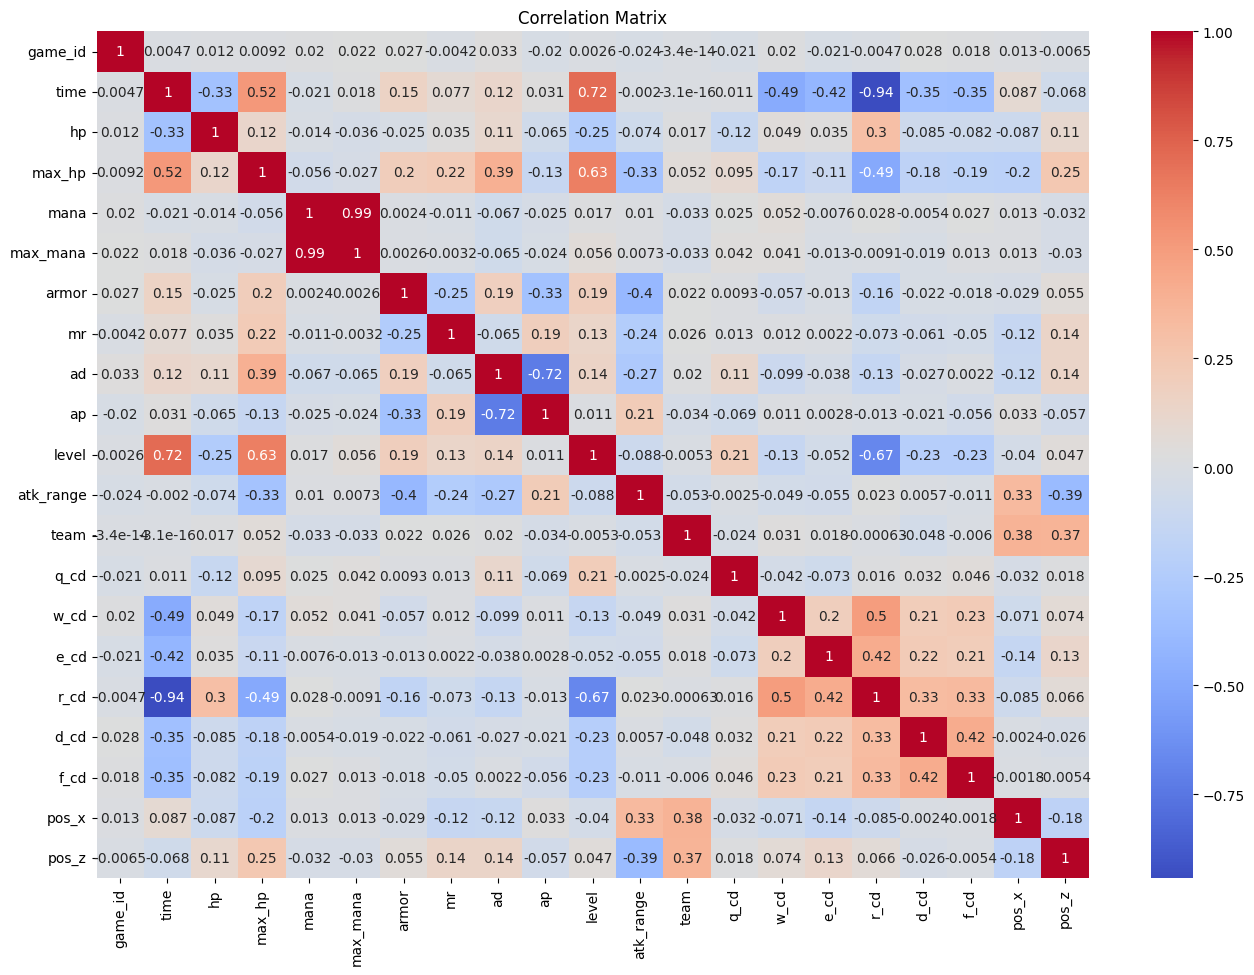

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target variables and features
target = ['pos_x', 'pos_z']
features = [col for col in data.columns if col not in target and "normalized" not in col and col not in [
    'name', 'q_name', 'w_name', 'e_name', 'r_name', 'd_name', 'f_name', 'compound_key', 'visible', ]]

# Correlation matrix
corr_matrix = data[features + target].corr()
plt.figure(figsize=(16, 11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Mutual Information

In [4]:
from sklearn.feature_selection import mutual_info_regression

# Mutual Information for pos_x
X = data[features]
y_pos_x = data['pos_x']
mi_pos_x = mutual_info_regression(X, y_pos_x)
mi_pos_x_series = pd.Series(mi_pos_x, index=features)

# Mutual Information for pos_z
y_pos_z = data['pos_z']
mi_pos_z = mutual_info_regression(X, y_pos_z)
mi_pos_z_series = pd.Series(mi_pos_z, index=features)

# Plot Mutual Information
plt.figure(figsize=(12, 6))
mi_pos_x_series.sort_values(ascending=False).plot.bar(
    color='blue', alpha=0.5, label='pos_x')
mi_pos_z_series.sort_values(ascending=False).plot.bar(
    color='red', alpha=0.5, label='pos_z')
plt.title('Mutual Information of Features')
plt.legend()
plt.show()

# Feature Importance

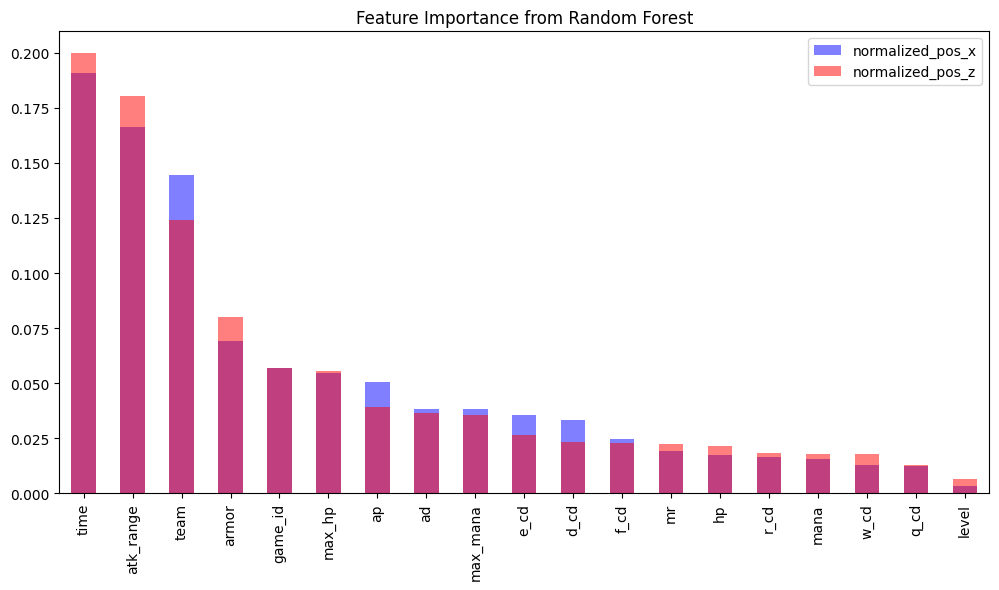

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Feature importance for pos_x
rf_pos_x = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pos_x.fit(X, y_pos_x)
importances_pos_x = rf_pos_x.feature_importances_
importance_pos_x_series = pd.Series(importances_pos_x, index=features)

# Feature importance for pos_z
rf_pos_z = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pos_z.fit(X, y_pos_z)
importances_pos_z = rf_pos_z.feature_importances_
importance_pos_z_series = pd.Series(importances_pos_z, index=features)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
importance_pos_x_series.sort_values(ascending=False).plot.bar(
    color='blue', alpha=0.5, label='pos_x')
importance_pos_z_series.sort_values(ascending=False).plot.bar(
    color='red', alpha=0.5, label='pos_z')
plt.title('Feature Importance from Random Forest')
plt.legend()
plt.show()

# Select Important Features and Create DataFrame

In [ ]:
# Select important features based on correlation and feature importance
correlation_threshold = 2
important_features = mi_pos_x_series[mi_pos_x_series >
                                     correlation_threshold].index.tolist()

# Create a dataframe with important features
selected_data = data[important_features + target]
print("Selected features:")
print(important_features)
selected_data.head()

NameError: name 'mi_pos_x_series' is not defined